In [ ]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

spark

In [ ]:
# !pip install findspark

In [ ]:
# import os
# os.environ["JAVA_HOME"]="/Library/Internet Plug-Ins/JavaAppletPlugin.plugin/Contents/Home"
# os.environ["SPARK_HOME"]="/Users/sudhirkk/spark-2.2.1-bin-hadoop2.7"

In [ ]:
#import findspark
#findspark.init()
from pyspark import SparkContext

sc=SparkContext.getOrCreate()
sc

In [ ]:
from pyspark.sql import SparkSession

spark=SparkSession.builder.getOrCreate()
spark

In [ ]:
!wget "https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD"

In [ ]:
!mv data/Crimes_-_2001_to_Present.csv reported-crimes.csv

In [ ]:
!cat data/reported-crimes.csv | head 

In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit
rc=spark.read.csv('data/reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh.mm.ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

In [ ]:
rc.printSchema()

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, TimestampType, BooleanType, IntegerType, DoubleType

In [ ]:
rc.columns

In [ ]:
# Define schema 
schema=StructType([
    StructField('ID',StringType,True),
    StructField('Case Number',StringType,True)
])

In [ ]:
labels = [
 ('ID',StringType()),
 ('Case Number',StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description',StringType()),
 ('Arrest',BooleanType()),
 ('Domestic',BooleanType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
 ('Year',IntegerType()),
 ('Updated On',TimestampType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location',StringType())
]

In [ ]:
schema=StructType([ StructField (x[0],x[1],True) for x in labels])
schema

In [ ]:
rc=spark.read.csv('data/reported-crimes.csv',schema=schema,header=True)
rc.printSchema()

In [ ]:
# data is not inserted properly will use inferschema 
rc.show(5)

In [ ]:
from pyspark.sql.functions import to_timestamp,col,lit
rc=spark.read.csv('data/reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

In [ ]:
rc.select('IUCR').show(5)

In [ ]:
rc.select(col('IUCR')).show(5)

In [ ]:
rc.select('Case Number','Date','Arrest').show(4)

In [ ]:
from pyspark.sql.functions import lit
rc.withColumn('One',lit(1)).show(5)

In [ ]:
rc = rc.drop('IUCR')
rc.show(5)

In [ ]:
## Read complete datas into rc DF
rc=spark.read.csv('data/reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') < lit('2018-11-12'))

In [ ]:
## Read one day data one_day DF
one_day=spark.read.csv('data/reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

In [ ]:
## concatenate/union above two dataframes rc and one_day
rc.union(one_day).orderBy('Date',ascending=False).show(5)

In [ ]:
## top 10 number of reported crimes by Primary(crime) type 
rc.groupBy('Primary Type').count().orderBy('count',ascending=False).show(10)

## Find the percentage of reported crimes that resulted in an arrest

In [ ]:
rc.select('arrest').distinct().show(5)

In [ ]:
rc.printSchema()

In [ ]:

#(rc.select('arrest').filter(col('arrest') == 'true').count()/rc.select('arrest').count()) * 100
(rc.filter(col('Arrest') == 'true').count()/rc.select('Arrest').count()) * 100


In [ ]:
# Find the top 3 locations for reported crimes
rc.groupBy('Location Description').count().orderBy('count',ascending=False).show(3)

## String functions

In [ ]:
from pyspark.sql.functions import lower, upper, substring

In [ ]:
help(substring)

In [ ]:
# rc.select(lower(col('Primary Type')),upper(col('Primary Type')),substring(col('Primary Type'),1,4)).show(5)
rc.select(lower('Primary Type'),upper('Primary Type'),substring('Primary Type',1,4)).show(5)

# Numeric functions

In [ ]:
from pyspark.sql.functions import min,max

In [ ]:
## min and max dates
#rc.select(min(col('Date')),max(col('Date'))).show()
rc.select(min('Date'),max('Date')).show()

In [ ]:
## 3 days earlier than oldest date and 3 days later than the most recent date
from pyspark.sql.functions import date_sub,date_add
rc.select(date_sub(min('Date'),3),date_add(max('Date'),3)).show()

In [ ]:
help(date_sub)

# Working with Dates and Timestamp

In [ ]:
from pyspark.sql.functions import to_date,to_timestamp

In [ ]:
spark.createDataFrame()

In [ ]:
# data
list_dates=[('2019-12-25 13:30:00','2020-01-01 13:30:00')]
#print(list_dates[0][0],list_dates[0][1])

# Define schema 
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, TimestampType, BooleanType, IntegerType, DoubleType

schema=StructType([
    StructField('Christmas',StringType(),True),
    StructField('New Year',StringType(),True)
])
df = spark.createDataFrame([to_timestamp('2019-12-25 13:30:00','yyyy-MM-dd HH:mm:ss'),to_timestamp('2019-12-25 13:30:00','yyyy-MM-dd HH:mm:ss')],schema=schema)
df.printSchema()
df.show()

In [ ]:
labels=['Christmas','New Year']
df = spark.createDataFrame(list_dates,labels)
df.show()

In [ ]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'),to_timestamp(col('New Year'),'yyyy-MM-dd HH:mm:ss')).show()

In [ ]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1)

In [ ]:
df.select(to_date(col('christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('christmas'),'dd/MMM/yyyy HH:mm:ss')).show()

In [ ]:
df = spark.createDataFrame([('25/Dec/2019 01:30:00 PM',)],['Christmas'])
df.show(1,truncate=False)

In [ ]:
df.select(to_date(col('christmas'),'dd/MMM/yyyy hh:mm:ss a'),to_timestamp(col('christmas'),'dd/MMM/yyyy hh:mm:ss a')).show()

In [ ]:
nrc = spark.read.csv('data/reported-crimes.csv',header=True)
nrc.select(to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).show(5,truncate=False)

In [9]:
from pyspark.sql.functions import to_timestamp,col,lit
## Read complete datas into rc DF
rc=spark.read.csv('data/reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') < lit('2018-11-12'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [ ]:
!wget -O data/police-station.csv "https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD"

In [ ]:
! cat  data/police-station.csv | wc -l

In [10]:
ps=spark.read.csv('data/police-station.csv',header=True)
ps.show(5,truncate=False)

+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|DISTRICT    |DISTRICT NAME|ADDRESS            |CITY   |STATE|ZIP  |WEBSITE                                                                     |PHONE       |FAX         |TTY         |X COORDINATE|Y COORDINATE|LATITUDE   |LONGITUDE   |LOCATION                       |
+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|Headquarters|Headquarters |3510 S Michigan Ave|Chicago|IL   |60653|http://home.chicagopolice.org                                               |null        |null        |null        |1177731.401 

In [11]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [12]:
rc.select('DISTRICT').distinct().show(30)

#rc.join(ps,rc.'District'==ps.'District')

+--------+
|DISTRICT|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|    null|
|     021|
+--------+



In [13]:
from pyspark.sql.functions import lpad

In [14]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [18]:
ps.select(lpad(col('DISTRICT'),3,'0')).distinct().show(5)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 009|
|                 012|
|                 024|
|                 Hea|
|                 015|
+--------------------+
only showing top 5 rows



In [20]:
ps = ps.withColumn('formate_district',lpad(col('DISTRICT'),3,'0'))
ps.select('district','formate_district').show(5)

+------------+----------------+
|    district|formate_district|
+------------+----------------+
|Headquarters|             Hea|
|          18|             018|
|          19|             019|
|          20|             020|
|          22|             022|
+------------+----------------+
only showing top 5 rows



In [21]:
rc.join(ps, rc.District == ps.formate_district, 'left_outer').show()

22/01/09 03:07:58 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+----------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|formate_dist

In [22]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'formate_district']

In [23]:
rc.join(ps, rc.District == ps.formate_district, 'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION'
).show()

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+----------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT| DISTRICT NAME|formate_district|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+--------------+----------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|       De

In [ ]:
# find the most frequently reported noncriminal activity

In [31]:
rc.select('Primary Type').distinct().count()

36

In [35]:
rc.select('Primary Type').distinct().orderBy('Primary Type').show(36,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [43]:
# find the most frequently reported noncriminal activity
nc = rc.filter((col('Primary type') == 'NON - CRIMINAL') | (col('Primary type') == 'NON-CRIMINAL') | (col('Primary type')== 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.groupBy('Description').count().orderBy('count',ascending=False).show(1)

+-------------+-----+
|  Description|count|
+-------------+-----+
|LOST PASSPORT|  107|
+-------------+-----+
only showing top 1 row



In [30]:
# find the day of the week with the most reported crime
rc.groupBy('Date').count().orderBy('count',ascending=False).show(10)

+-------------------+-----+
|               Date|count|
+-------------------+-----+
|2008-01-01 00:01:00|  302|
|2007-01-01 00:01:00|  256|
|2006-01-01 00:01:00|  226|
|2004-01-01 00:00:00|  216|
|2005-01-01 00:01:00|  214|
|2003-01-01 00:01:00|  213|
|2003-01-01 00:00:00|  207|
|2007-01-01 00:00:00|  204|
|2009-01-01 00:01:00|  199|
|2012-01-01 00:01:00|  198|
+-------------------+-----+
only showing top 10 rows



In [50]:
from pyspark.sql.functions import dayofweek,date_format

In [51]:
# Use "E" for day names in letters
rc.select(col('Date'),dayofweek('Date'),date_format('Date','E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [53]:
rc.groupBy(date_format('Date','E')).count().orderBy('count',ascending=False).show(7)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017214|
|                 Wed| 974115|
|                 Tue| 968255|
|                 Sat| 965387|
|                 Thu| 964826|
|                 Mon| 952971|
|                 Sun| 912819|
+--------------------+-------+



In [54]:
rc.groupBy(date_format('Date','E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912819),
 Row(date_format(Date, E)='Mon', count=952971),
 Row(date_format(Date, E)='Thu', count=964826),
 Row(date_format(Date, E)='Sat', count=965387),
 Row(date_format(Date, E)='Wed', count=974115),
 Row(date_format(Date, E)='Fri', count=1017214),
 Row(date_format(Date, E)='Tue', count=968255)]

In [55]:
dow = [ x[0] for x in rc.groupBy(date_format('Date','E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [56]:
noc = [ x[1] for x in rc.groupBy(date_format('Date','E')).count().collect()]
noc

[912819, 952971, 964826, 965387, 974115, 1017214, 968255]

In [59]:
#!pip install matplotlib
import pandas as pd 
import matplotlib.pyplot as plt

In [60]:
cp=pd.DataFrame({'Day_of_week':dow,'count':noc})
cp.head(7)

,Day_of_week,count
0,Sun,912819
1,Mon,952971
2,Thu,964826
3,Sat,965387
4,Wed,974115
5,Fri,1017214
6,Tue,968255


Text(0.5, 1.0, 'No. of reported crimes per day of the week from 2001 to present')

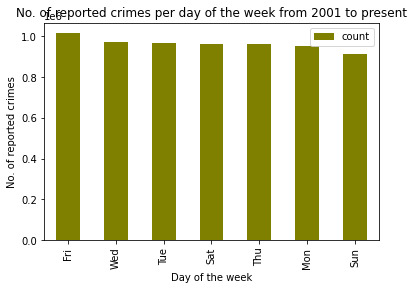

22/01/09 11:00:06 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 20895177 ms exceeds timeout 120000 ms
22/01/09 11:00:06 WARN SparkContext: Killing executors is not supported by current scheduler.


In [62]:
cp.sort_values('count',ascending=False).plot(kind='bar',color='olive',x='Day_of_week',y='count')
plt.xlabel('Day of the week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the week from 2001 to present')

# Working with RDDs

In [65]:
!ls data

police-station.csv  reported-crimes.csv


In [66]:
psrdd = sc.textFile('data/police-station.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [67]:
ps_header = psrdd.first()

In [68]:
ps_rest = psrdd.filter(lambda line: line != ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

In [70]:
## number of police stations
ps_rest.map(lambda line : line.split(',')).count()

24

In [83]:
## Display the district ID,District name,address and zip for the police station with district ID 7
(ps_rest.filter(lambda line: line.split(',')[0] == '7').
  map(lambda line: (line.split(',')[0],
                    line.split(',')[1],
                    line.split(',')[2],
                    line.split(',')[5]
                    )).collect())

[('7', 'Englewood', '1438 W 63rd St', '60636')]